# Feature Engineering and Preprocessing

This notebook performs preprocessing and feature engineering on the cleaned marine engine fault dataset.

**Objectives:**
- Load cleaned dataset from previous notebook
- Separate features from target variable
- Split data into train and test sets (stratified)
- Scale features using StandardScaler
- Implement SMOTE for class imbalance handling
- Created balanced training dataset
- Saved both balanced and original datasets
- Added class distribution visualizations
- Test set preserved for unbiased evaluation
- Save preprocessor for deployment

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)

## 1. Load Cleaned Dataset

In [2]:
# Load the marine engine fault dataset
df = pd.read_csv('../data/marine_engine_fault_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"Total features: {df.shape[1]}")

# Display first few rows
df.head()

Dataset shape: (10000, 20)
Total records: 10,000
Total features: 20


,Timestamp,Shaft_RPM,Engine_Load,Fuel_Flow,Air_Pressure,Ambient_Temp,Oil_Temp,Oil_Pressure,Vibration_X,Vibration_Y,Vibration_Z,Fault_Label,Cylinder1_Pressure,Cylinder1_Exhaust_Temp,Cylinder2_Pressure,Cylinder2_Exhaust_Temp,Cylinder3_Pressure,Cylinder3_Exhaust_Temp,Cylinder4_Pressure,Cylinder4_Exhaust_Temp
0,2024-01-01 00:00:00,965.414073,72.397307,114.665107,1.025896,27.055404,73.000474,3.407503,0.087248,0.076305,0.069988,0,157.710104,418.761079,139.335694,449.428109,151.140472,400.142839,138.194303,469.788241
1,2024-01-01 00:00:01,996.888052,90.818713,156.425262,1.258291,26.686902,77.039208,2.935203,0.035802,0.066677,0.077774,0,163.301036,416.912327,151.742643,383.042000,147.326823,400.557809,131.104323,430.206873
2,2024-01-01 00:00:02,948.424675,76.358257,126.188656,1.184234,25.482428,79.076912,3.942825,0.102402,0.047158,0.046104,0,148.868866,455.707882,155.441964,374.099103,131.471313,455.522306,143.895843,417.453433
3,2024-01-01 00:00:03,982.370968,63.822324,107.840402,1.150488,24.372997,78.028895,3.893302,0.065176,0.067617,0.041622,0,142.861369,464.990838,137.514280,407.003480,154.426397,423.237676,145.149830,383.834081
4,2024-01-01 00:00:04,973.166374,69.483056,113.637069,1.174918,30.678317,78.353818,3.518891,0.047297,0.085649,0.093252,0,138.080575,407.992398,144.795201,482.424962,152.438065,427.269295,162.077661,450.501985


## 2. Separate Features from Target

In [3]:
# Define the 18 sensor feature columns
sensor_features = [
    'Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp',
    'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
    'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp',
    'Cylinder2_Pressure', 'Cylinder2_Exhaust_Temp',
    'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp',
    'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp'
]

# Separate features (X) and target (y)
X = df[sensor_features].copy()
y = df['Fault_Label'].copy()

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(sensor_features)}):")
for i, feature in enumerate(sensor_features, 1):
    print(f"  {i}. {feature}")

Features shape: (10000, 18)
Target shape: (10000,)

Feature columns (18):
  1. Shaft_RPM
  2. Engine_Load
  3. Fuel_Flow
  4. Air_Pressure
  5. Ambient_Temp
  6. Oil_Temp
  7. Oil_Pressure
  8. Vibration_X
  9. Vibration_Y
  10. Vibration_Z
  11. Cylinder1_Pressure
  12. Cylinder1_Exhaust_Temp
  13. Cylinder2_Pressure
  14. Cylinder2_Exhaust_Temp
  15. Cylinder3_Pressure
  16. Cylinder3_Exhaust_Temp
  17. Cylinder4_Pressure
  18. Cylinder4_Exhaust_Temp


In [4]:
# Verify no missing values in features or target
print("Missing values in features:")
print(X.isnull().sum().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("\n ✅ No missing values - ready for splitting!")

Missing values in features:
0

Missing values in target: 0

 ✅ No missing values - ready for splitting!


## 3. Train-Test Split (Stratified)

Using stratified split to maintain the same class distribution in both train and test sets.

In [5]:
# Split data: 80% train, 20% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Data Split Summary:")
print("=" * 80)
print(f"Training set size: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

Data Split Summary:
Training set size: 8,000 (80.0%)
Test set size: 2,000 (20.0%)

Training features shape: (8000, 18)
Test features shape: (2000, 18)


In [6]:
# Verify stratification - compare class distributions
train_dist = y_train.value_counts(normalize=True).sort_index() * 100
test_dist = y_test.value_counts(normalize=True).sort_index() * 100
original_dist = y.value_counts(normalize=True).sort_index() * 100

# Define fault label mapping
FAULT_LABELS = {
    0: "Normal",
    1: "Fuel Injection Fault",
    2: "Cooling System Fault",
    3: "Turbocharger Fault",
    4: "Bearing Wear",
    5: "Lubrication Oil Degradation",
    6: "Air Intake Restriction",
    7: "Vibration Anomaly"
}

comparison_df = pd.DataFrame({
    'Fault Label': [FAULT_LABELS[i] for i in range(8)],
    'Original (%)': original_dist.values,
    'Train (%)': train_dist.values,
    'Test (%)': test_dist.values
})

print("\nClass Distribution Comparison:")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Calculate maximum deviation
max_deviation = max(
    abs(train_dist - original_dist).max(),
    abs(test_dist - original_dist).max()
)
print(f"\nMaximum deviation from original distribution: {max_deviation:.3f}%")

if max_deviation < 1.0:
    print(" ✅ Stratification successful - distributions are well-preserved!")


Class Distribution Comparison:
                Fault Label  Original (%)  Train (%)  Test (%)
                     Normal         65.07    65.0750     65.05
       Fuel Injection Fault          5.09     5.0875      5.10
       Cooling System Fault          4.98     4.9750      5.00
         Turbocharger Fault          4.88     4.8875      4.85
               Bearing Wear          4.81     4.8125      4.80
Lubrication Oil Degradation          4.99     4.9875      5.00
     Air Intake Restriction          5.19     5.1875      5.20
          Vibration Anomaly          4.99     4.9875      5.00

Maximum deviation from original distribution: 0.030%
 ✅ Stratification successful - distributions are well-preserved!


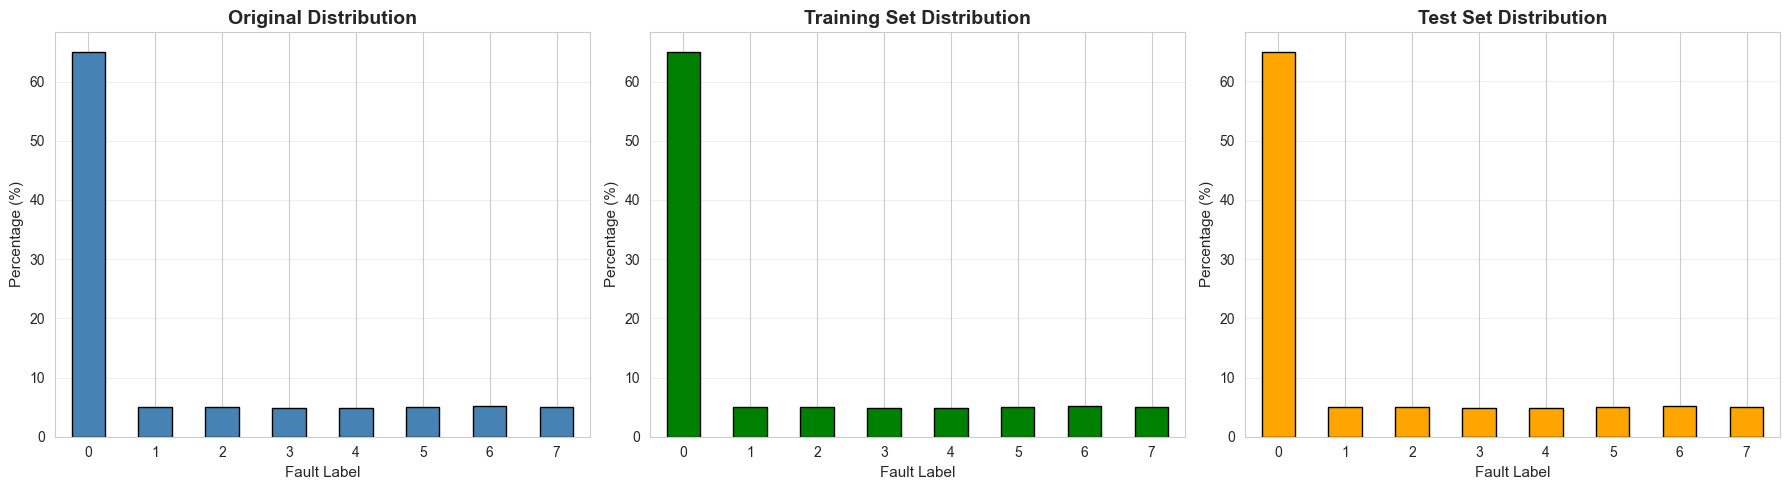

In [7]:
# Visualize class distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
original_dist.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Original Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fault Label', fontsize=11)
axes[0].set_ylabel('Percentage (%)', fontsize=11)
axes[0].set_xticklabels(range(8), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Training distribution
train_dist.plot(kind='bar', ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fault Label', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].set_xticklabels(range(8), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Test distribution
test_dist.plot(kind='bar', ax=axes[2], color='orange', edgecolor='black')
axes[2].set_title('Test Set Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Fault Label', fontsize=11)
axes[2].set_ylabel('Percentage (%)', fontsize=11)
axes[2].set_xticklabels(range(8), rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Feature Scaling with StandardScaler

Standardizing features to have mean=0 and std=1. This is important for:
- Ensuring all features contribute equally to the model
- Improving convergence speed
- Making SHAP values more interpretable

**Important**: Fit the scaler ONLY on training data to prevent data leakage!

In [8]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data ONLY
scaler.fit(X_train)

print("StandardScaler fitted on training data")
print("=" * 80)
print(f"Number of features: {scaler.n_features_in_}")
print(f"Feature names: {scaler.feature_names_in_}")

StandardScaler fitted on training data
Number of features: 18
Feature names: ['Shaft_RPM' 'Engine_Load' 'Fuel_Flow' 'Air_Pressure' 'Ambient_Temp'
 'Oil_Temp' 'Oil_Pressure' 'Vibration_X' 'Vibration_Y' 'Vibration_Z'
 'Cylinder1_Pressure' 'Cylinder1_Exhaust_Temp' 'Cylinder2_Pressure'
 'Cylinder2_Exhaust_Temp' 'Cylinder3_Pressure' 'Cylinder3_Exhaust_Temp'
 'Cylinder4_Pressure' 'Cylinder4_Exhaust_Temp']


In [9]:
# Display scaling parameters (mean and std for each feature)
scaling_params = pd.DataFrame({
    'Feature': sensor_features,
    'Mean': scaler.mean_,
    'Std': scaler.scale_
})

print("\nScaling Parameters (from training data):")
print("=" * 80)
print(scaling_params.to_string(index=False))


Scaling Parameters (from training data):
               Feature       Mean       Std
             Shaft_RPM 949.660854 49.446817
           Engine_Load  69.837094 10.025142
             Fuel_Flow 129.146973 15.603366
          Air_Pressure   1.173712  0.150594
          Ambient_Temp  28.016649  3.028575
              Oil_Temp  80.772745  5.966453
          Oil_Pressure   3.353384  0.614421
           Vibration_X   0.064030  0.067349
           Vibration_Y   0.064282  0.067403
           Vibration_Z   0.079887  0.090954
    Cylinder1_Pressure 144.747743 10.365527
Cylinder1_Exhaust_Temp 422.103973 33.603069
    Cylinder2_Pressure 144.675979 10.471478
Cylinder2_Exhaust_Temp 423.117664 33.951678
    Cylinder3_Pressure 144.842036 10.388062
Cylinder3_Exhaust_Temp 422.598553 33.991020
    Cylinder4_Pressure 144.696907 10.425951
Cylinder4_Exhaust_Temp 421.798383 33.507717


In [10]:
# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Transformation Complete:")
print("=" * 80)
print(f"Training data scaled: {X_train_scaled.shape}")
print(f"Test data scaled: {X_test_scaled.shape}")

# Convert back to DataFrames for easier analysis
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=sensor_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=sensor_features, index=X_test.index)

Data Transformation Complete:
Training data scaled: (8000, 18)
Test data scaled: (2000, 18)


In [11]:
# Verify scaling - check mean and std of scaled training data
print("\nVerification of Scaled Training Data:")
print("=" * 80)
print("Expected: Mean Ã¢â€°Ë† 0, Std Ã¢â€°Ë† 1 for all features\n")

verification_df = pd.DataFrame({
    'Feature': sensor_features,
    'Mean': X_train_scaled_df.mean().values,
    'Std': X_train_scaled_df.std().values
})

print(verification_df.to_string(index=False))

# Check if scaling is correct (mean close to 0, std close to 1)
mean_check = np.allclose(X_train_scaled_df.mean(), 0, atol=1e-10)
std_check = np.allclose(X_train_scaled_df.std(), 1, atol=1e-2)

if mean_check and std_check:
    print("\n ✅ Scaling verified successfully!")
else:
    print("\nÃ¢Å¡Â  Warning: Scaling parameters may need review")


Verification of Scaled Training Data:
Expected: Mean Ã¢â€°Ë† 0, Std Ã¢â€°Ë† 1 for all features

               Feature          Mean      Std
             Shaft_RPM -1.223022e-15 1.000063
           Engine_Load  8.109069e-16 1.000063
             Fuel_Flow -3.019807e-16 1.000063
          Air_Pressure  6.750156e-16 1.000063
          Ambient_Temp -1.776357e-16 1.000063
              Oil_Temp -2.614797e-15 1.000063
          Oil_Pressure -7.021050e-16 1.000063
           Vibration_X  6.750156e-17 1.000063
           Vibration_Y  7.993606e-17 1.000063
           Vibration_Z  3.963496e-17 1.000063
    Cylinder1_Pressure -4.072298e-16 1.000063
Cylinder1_Exhaust_Temp -6.252776e-16 1.000063
    Cylinder2_Pressure  1.707079e-15 1.000063
Cylinder2_Exhaust_Temp -1.195488e-15 1.000063
    Cylinder3_Pressure  2.287059e-16 1.000063
Cylinder3_Exhaust_Temp  1.941558e-15 1.000063
    Cylinder4_Pressure -1.679545e-15 1.000063
Cylinder4_Exhaust_Temp -8.614220e-16 1.000063

 ✅ Scaling verified successf

### Visualize Before/After Scaling

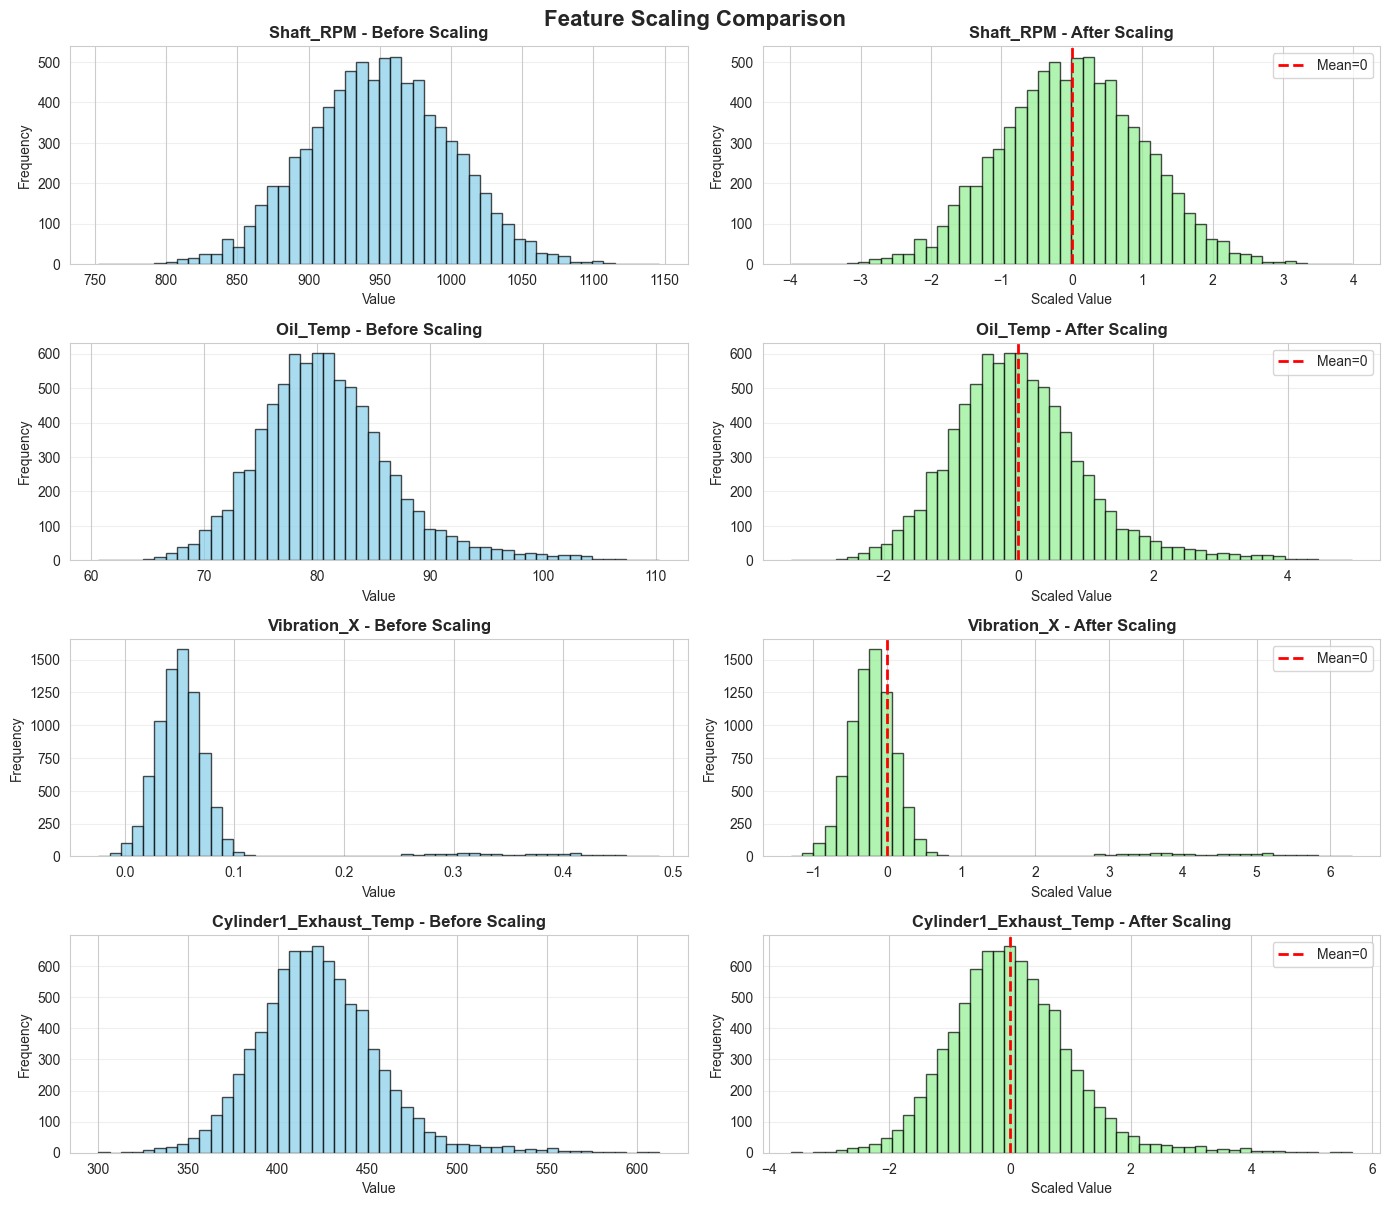

In [12]:
# Compare distributions before and after scaling for a few key features
sample_features = ['Shaft_RPM', 'Oil_Temp', 'Vibration_X', 'Cylinder1_Exhaust_Temp']

fig, axes = plt.subplots(len(sample_features), 2, figsize=(14, 12))

for idx, feature in enumerate(sample_features):
    # Before scaling
    axes[idx, 0].hist(X_train[feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{feature} - Before Scaling', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel('Value', fontsize=10)
    axes[idx, 0].set_ylabel('Frequency', fontsize=10)
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # After scaling
    axes[idx, 1].hist(X_train_scaled_df[feature], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{feature} - After Scaling', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel('Scaled Value', fontsize=10)
    axes[idx, 1].set_ylabel('Frequency', fontsize=10)
    axes[idx, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Mean=0')
    axes[idx, 1].grid(axis='y', alpha=0.3)
    axes[idx, 1].legend()

plt.tight_layout()
plt.suptitle('Feature Scaling Comparison', fontsize=16, fontweight='bold', y=1.001)
plt.show()

## 5. Save Preprocessor for Deployment

Saving the fitted StandardScaler so it can be loaded by the FastAPI backend for consistent preprocessing during inference.

In [13]:
# Create artifacts directory if it doesn't exist
artifacts_dir = '../backend/artifacts'
os.makedirs(artifacts_dir, exist_ok=True)

print(f"Artifacts directory: {artifacts_dir}")
print(f"Directory exists: {os.path.exists(artifacts_dir)}")

Artifacts directory: ../backend/artifacts
Directory exists: True


In [14]:
# Save the fitted StandardScaler
preprocessor_path = os.path.join(artifacts_dir, 'preprocessor.pkl')
joblib.dump(scaler, preprocessor_path)

print(f"\n ✅ Preprocessor saved to: {preprocessor_path}")
print(f"File size: {os.path.getsize(preprocessor_path) / 1024:.2f} KB")


 ✅ Preprocessor saved to: ../backend/artifacts\preprocessor.pkl
File size: 1.58 KB


In [15]:
# Verify the saved preprocessor by loading it back
loaded_scaler = joblib.load(preprocessor_path)

print("\nVerifying saved preprocessor:")
print("=" * 80)
print(f"Number of features: {loaded_scaler.n_features_in_}")
print(f"Feature names match: {np.array_equal(loaded_scaler.feature_names_in_, sensor_features)}")
print(f"Mean values match: {np.allclose(loaded_scaler.mean_, scaler.mean_)}")
print(f"Scale values match: {np.allclose(loaded_scaler.scale_, scaler.scale_)}")

# Test transformation with loaded scaler
test_sample = X_test.iloc[:5]
original_transform = scaler.transform(test_sample)
loaded_transform = loaded_scaler.transform(test_sample)

transforms_match = np.allclose(original_transform, loaded_transform)
print(f"Transformations match: {transforms_match}")

if transforms_match:
    print("\n ✅ Preprocessor saved and verified successfully!")


Verifying saved preprocessor:
Number of features: 18
Feature names match: True
Mean values match: True
Scale values match: True
Transformations match: True

 ✅ Preprocessor saved and verified successfully!


## 7. Summary

### Preprocessing Pipeline Complete!

**What we accomplished:**

1. ✅ Loaded cleaned dataset with 18 sensor features
2. ✅ Separated features (X) from target (y)
3. ✅ Split data into 80% train / 20% test with stratification
4. ✅ Fitted StandardScaler on training data only
5. ✅ Transformed both train and test sets
6. ✅ Applied SMOTE to balance training data (class imbalance handling)
7. ✅ Saved balanced training data for model training
8. ✅ Saved preprocessor to `backend/artifacts/preprocessor.pkl`

**Key Statistics:**
- Original training samples: 8,000
- Balanced training samples: 41,648 (after SMOTE)
- Test samples: 2,000 (preserved, not balanced)
- Features: 18 sensor measurements
- Target classes: 8 fault types (now balanced in training set)

**Class Imbalance Handling:**
- Applied SMOTE (Synthetic Minority Over-sampling Technique)
- Balanced all minority fault classes to match majority class
- Test set preserved for unbiased evaluation
- Balanced data saved to `backend/artifacts/X_train_balanced.npy` and `y_train_balanced.npy`

**Next Steps:**

The preprocessed and balanced data is ready for model training. The next notebook will:
- Load balanced training data from SMOTE
- Train LightGBM classifier with hyperparameter tuning
- Use class weights for improved minority class performance
- Evaluate model performance (target: F1-score > 0.90)
- Generate confusion matrix and classification report
- Save trained model to `backend/artifacts/lgbm_model.pkl`

In [16]:
# Export preprocessed data for next notebook (optional - can also regenerate)
print("\nPreprocessed data available in memory:")
print("=" * 80)
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print("\nÃ¢Å“â€œ Ready for model training!")


Preprocessed data available in memory:
X_train_scaled: (8000, 18)
X_test_scaled: (2000, 18)
y_train: (8000,)
y_test: (2000,)

Ã¢Å“â€œ Ready for model training!


## 5. Handle Class Imbalance with SMOTE

Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the training dataset.
This will help the model learn better from minority fault classes.

In [17]:
# Import SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
# Calculate appropriate k_neighbors parameter
# k_neighbors must be less than the smallest class size
min_class_size = min(Counter(y_train).values())
k_neighbors = min(5, min_class_size - 1)

print(f'Minimum class size in training set: {min_class_size}')
print(f'Using k_neighbors = {k_neighbors} for SMOTE')

# Apply SMOTE to training data (after scaling)
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f'\nOriginal training set size: {len(X_train_scaled):,}')
print(f'Balanced training set size: {len(X_train_balanced):,}')
print(f'Increase: {len(X_train_balanced) - len(X_train_scaled):,} samples ({(len(X_train_balanced)/len(X_train_scaled)-1)*100:.1f}%)')

Minimum class size in training set: 385
Using k_neighbors = 5 for SMOTE

Original training set size: 8,000
Balanced training set size: 41,648
Increase: 33,648 samples (420.6%)



Class Distribution Before SMOTE:
0 - Normal: 5,206 (65.08%)
1 - Fuel Injection Fault: 407 (5.09%)
2 - Cooling System Fault: 398 (4.98%)
3 - Turbocharger Fault: 391 (4.89%)
4 - Bearing Wear: 385 (4.81%)
5 - Lubrication Oil Degradation: 399 (4.99%)
6 - Air Intake Restriction: 415 (5.19%)
7 - Vibration Anomaly: 399 (4.99%)

Class Distribution After SMOTE:
0 - Normal: 5,206 (12.50%)
1 - Fuel Injection Fault: 5,206 (12.50%)
2 - Cooling System Fault: 5,206 (12.50%)
3 - Turbocharger Fault: 5,206 (12.50%)
4 - Bearing Wear: 5,206 (12.50%)
5 - Lubrication Oil Degradation: 5,206 (12.50%)
6 - Air Intake Restriction: 5,206 (12.50%)
7 - Vibration Anomaly: 5,206 (12.50%)


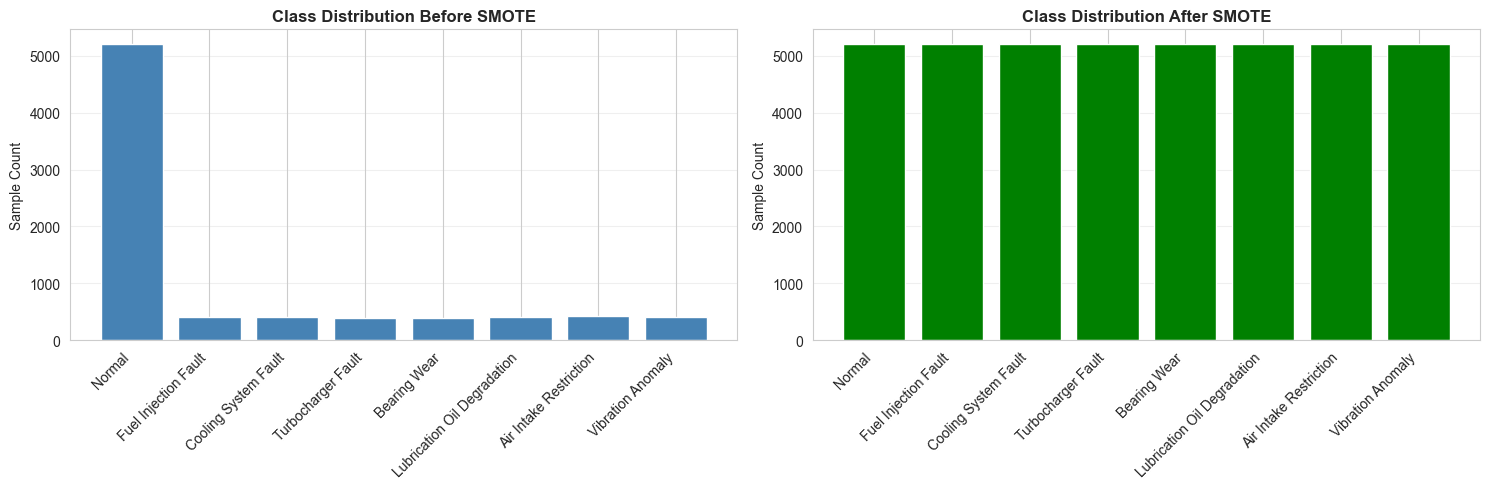

In [19]:
# Compare class distribution before and after SMOTE
print('\nClass Distribution Before SMOTE:')
print('=' * 80)
before_counts = Counter(y_train)
for label in sorted(before_counts.keys()):
    count = before_counts[label]
    percentage = (count / len(y_train)) * 100
    print(f'{label} - {FAULT_LABELS[label]}: {count:,} ({percentage:.2f}%)')

print('\nClass Distribution After SMOTE:')
print('=' * 80)
after_counts = Counter(y_train_balanced)
for label in sorted(after_counts.keys()):
    count = after_counts[label]
    percentage = (count / len(y_train_balanced)) * 100
    print(f'{label} - {FAULT_LABELS[label]}: {count:,} ({percentage:.2f}%)')

# Create bar plot comparing distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before SMOTE
labels_before = [FAULT_LABELS[i] for i in sorted(before_counts.keys())]
counts_before = [before_counts[i] for i in sorted(before_counts.keys())]
ax1.bar(range(len(labels_before)), counts_before, color='steelblue')
ax1.set_xticks(range(len(labels_before)))
ax1.set_xticklabels(labels_before, rotation=45, ha='right')
ax1.set_ylabel('Sample Count')
ax1.set_title('Class Distribution Before SMOTE', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# After SMOTE
labels_after = [FAULT_LABELS[i] for i in sorted(after_counts.keys())]
counts_after = [after_counts[i] for i in sorted(after_counts.keys())]
ax2.bar(range(len(labels_after)), counts_after, color='green')
ax2.set_xticks(range(len(labels_after)))
ax2.set_xticklabels(labels_after, rotation=45, ha='right')
ax2.set_ylabel('Sample Count')
ax2.set_title('Class Distribution After SMOTE', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### SMOTE Balancing Results

SMOTE has successfully balanced the training dataset:
- **All classes now have equal representation** in the training set
- **Synthetic samples** were generated for minority classes
- **Test set remains unchanged** to provide unbiased evaluation

This balanced dataset will help the model learn patterns from all fault types equally.

In [20]:
# Create artifacts directory if it doesn't exist
os.makedirs('../backend/artifacts', exist_ok=True)

# Save balanced training data
np.save('../backend/artifacts/X_train_balanced.npy', X_train_balanced)
np.save('../backend/artifacts/y_train_balanced.npy', y_train_balanced)

# Save original scaled training data for comparison
np.save('../backend/artifacts/X_train_scaled.npy', X_train_scaled)
np.save('../backend/artifacts/y_train.npy', y_train)

# Test set remains unchanged
np.save('../backend/artifacts/X_test_scaled.npy', X_test_scaled)
np.save('../backend/artifacts/y_test.npy', y_test)

print('✅ Saved datasets to backend/artifacts/:')
print('  - X_train_balanced.npy (balanced training features)')
print('  - y_train_balanced.npy (balanced training labels)')
print('  - X_train_scaled.npy (original training features)')
print('  - y_train.npy (original training labels)')
print('  - X_test_scaled.npy (test features - unchanged)')
print('  - y_test.npy (test labels - unchanged)')

print(f'\nTest set shape preserved: {X_test_scaled.shape}')
print('Test set remains unmodified for unbiased evaluation.')

✅ Saved datasets to backend/artifacts/:
  - X_train_balanced.npy (balanced training features)
  - y_train_balanced.npy (balanced training labels)
  - X_train_scaled.npy (original training features)
  - y_train.npy (original training labels)
  - X_test_scaled.npy (test features - unchanged)
  - y_test.npy (test labels - unchanged)

Test set shape preserved: (2000, 18)
Test set remains unmodified for unbiased evaluation.
